<a href="https://colab.research.google.com/github/binayak13swain/MCA-activitys-assingment-/blob/main/dailyDialog_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense


In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
texts = df['dialog'].values
labels = df['emotion'].values
labels

array(['[0 0 0 0 0 0 4 4 4 4]', '[0 0 6 0 0 0]', '[0 0 0 0 0]', ...,
       '[0 0 6 0 6 0 0 0 0 0 0 0 0 0 4 0]', '[0 0 0 0]', '[0 0]'],
      dtype=object)

In [ ]:
df.head()

,dialog,act,emotion
0,"['Say , Jim , how about going for a few beers ...",[3 4 2 2 2 3 4 1 3 4],[0 0 0 0 0 0 4 4 4 4]
1,"['Can you do push-ups ? '\n "" Of course I can ...",[2 1 2 2 1 1],[0 0 6 0 0 0]
2,"['Can you study with the radio on ? '\n ' No ,...",[2 1 2 1 1],[0 0 0 0 0]
3,['Are you all right ? '\n ' I will be all righ...,[2 1 1 1],[0 0 0 0]
4,"['Hey John , nice skates . Are they new ? '\n ...",[2 1 2 1 1 2 1 3 4],[0 0 0 0 0 6 0 6 0]


In [ ]:
df.shape

(11118, 3)

In [ ]:
df.tail()

,dialog,act,emotion
11113,"['Hello , I bought a pen in your shop just bef...",[1 1 1 2 3 2 1 4 1],[0 4 0 0 0 0 0 0 4]
11114,['Do you have any seats available ? ' ' Yes . ...,[2 1 2 1 3 4],[0 0 0 0 0 4]
11115,"['Uncle Ben , how did the Forbidden City get t...",[2 1 2 1 1 1 1 1 2 1 2 1 2 1 3 4],[0 0 6 0 6 0 0 0 0 0 0 0 0 0 4 0]
11116,"['May I help you , sir ? ' ' I want a pair of ...",[2 3 4 3],[0 0 0 0]
11117,"['Could I have the check , please ? ' "" Okay ....",[3 4],[0 0]


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

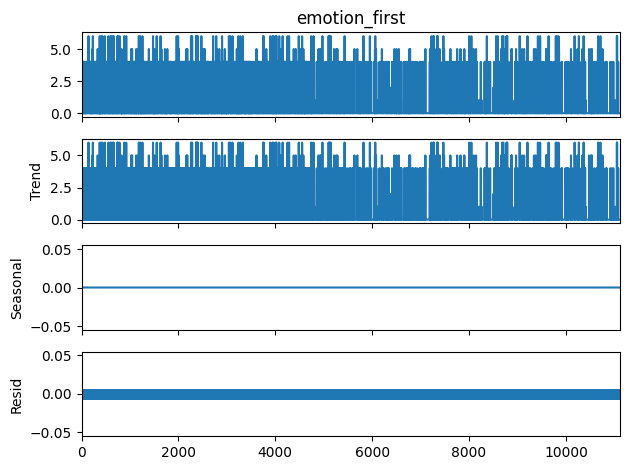

In [ ]:
df['emotion'] = df['emotion'].apply(lambda x: [int(i) for i in x[1:-1].split()])


df['emotion_first'] = df['emotion'].apply(lambda x: x[0] if x else np.nan)


result = seasonal_decompose(df['emotion_first'], model='additive', period=1)

result.plot();

In [ ]:
len(df)

11118

In [ ]:
train= df.iloc[:156]
test = df.iloc[156:]

In [ ]:
print(train.columns)

Index(['dialog', 'act', 'emotion', 'emotion_first'], dtype='object')


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index


In [ ]:
model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=128, input_length=max_sequence_length))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:

print(f"Length of sequences: {len(sequences)}")
print(f"Length of labels: {len(labels)}")
labels = labels[:len(sequences)]

max_sequence_length = max([len(seq) for seq in sequences])
data = pad_sequences(sequences, maxlen=max_sequence_length)

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

X_train, X_val, y_train, y_val = train_test_split(data, encoded_labels, test_size=0.2, random_state=42)

Length of sequences: 11118
Length of labels: 11118


In [ ]:
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_val, y_val))


print("Training Accuracy:", history.history['accuracy'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])

Epoch 1/3
278/278 ━━━━━━━━━━━━━━━━━━━━ 657s 2s/step - accuracy: 0.0894 - loss: 6.4432 - val_accuracy: 0.1093 - val_loss: 5.8415
Epoch 2/3
278/278 ━━━━━━━━━━━━━━━━━━━━ 634s 2s/step - accuracy: 0.1132 - loss: 5.5282 - val_accuracy: 0.1093 - val_loss: 5.9896
Epoch 3/3
278/278 ━━━━━━━━━━━━━━━━━━━━ 616s 2s/step - accuracy: 0.1175 - loss: 5.4467 - val_accuracy: 0.1093 - val_loss: 6.0658
Training Accuracy: 0.11479648947715759
Validation Accuracy: 0.10926259309053421
